In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns

In [ ]:
df=pd.read_csv('data.csv',encoding='latin-1')
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [ ]:
df.isnull().sum().sum()

np.int64(0)

In [ ]:
df['Holiday'].unique()

array(['No Holiday', 'Holiday'], dtype=object)

In [ ]:
df['Holiday']=df['Holiday'].map({'No Holiday':0,'Holiday':1})

In [ ]:
df['Holiday']

,Holiday
0,0
1,0
2,0
3,0
4,0
...,...
8755,0
8756,0
8757,0
8758,0


In [ ]:
df['Functioning Day'].value_counts()

,count
Functioning Day,
Yes,8465
No,295


In [ ]:
df['Functioning Day']=df['Functioning Day'].map({'Yes':1,'No':0})
df['Functioning Day'].value_counts()

,count
Functioning Day,
1,8465
0,295


In [ ]:
df=pd.get_dummies(df,columns=['Seasons'],drop_first=True)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
numeric_features = ['Temperature(°C)', 'Humidity(%)', 'Wind speed (m/s)', 'Visibility (10m)',
                    'Dew point temperature(°C)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']
df[numeric_features]=scaler.fit_transform(df[numeric_features])

In [ ]:
df.drop('Date',inplace=True,axis=1)

In [ ]:
df

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-1.513957,-1.042483,0.458476,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,0,1,False,False,True
1,204,1,-1.539074,-0.993370,-0.892561,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,0,1,False,False,True
2,173,2,-1.580936,-0.944257,-0.699556,0.925871,-1.667262,-0.655132,-0.1318,-0.171891,0,1,False,False,True
3,107,3,-1.597680,-0.895144,-0.796059,0.925871,-1.659605,-0.655132,-0.1318,-0.171891,0,1,False,False,True
4,78,4,-1.580936,-1.091596,0.554978,0.925871,-1.736177,-0.655132,-0.1318,-0.171891,0,1,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,1003,19,-0.726961,-1.189822,0.844486,0.751605,-1.100630,-0.655132,-0.1318,-0.171891,0,1,False,False,False
8756,764,20,-0.793939,-1.042483,0.554978,0.925871,-1.070001,-0.655132,-0.1318,-0.171891,0,1,False,False,False
8757,694,21,-0.860918,-0.944257,-1.375075,0.873263,-1.070001,-0.655132,-0.1318,-0.171891,0,1,False,False,False
8758,712,22,-0.902779,-0.846031,-0.699556,0.694064,-1.062344,-0.655132,-0.1318,-0.171891,0,1,False,False,False


<Axes: >

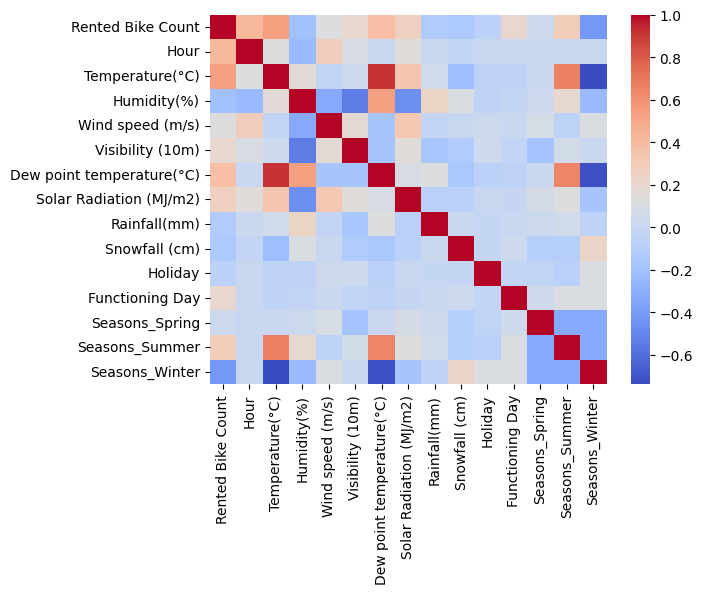

In [ ]:
sns.heatmap(df.corr(),cmap='coolwarm')

In [ ]:
from sklearn.model_selection import train_test_split
X=df.drop(columns=['Rented Bike Count'])
y=df['Rented Bike Count']

In [ ]:
y

,Rented Bike Count
0,254
1,204
2,173
3,107
4,78
...,...
8755,1003
8756,764
8757,694
8758,712


In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
model=LinearRegression()

In [ ]:
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
y_pred

array([ 954.81142423, 1145.20250953, 1358.60879696, ...,  930.37904193,
       -148.9288249 , 1319.26786032])

<Axes: xlabel='Rented Bike Count'>

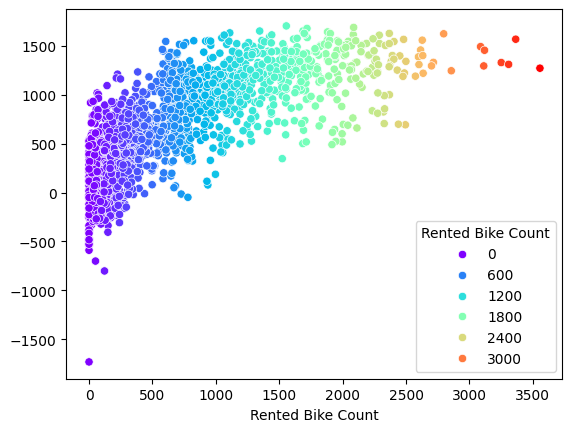

In [ ]:
sns.scatterplot(x=y_test,y=y_pred,palette='rainbow',hue=y_test)